# PROJECT 2 DSU (Supervised Learning)

Nama : Faris Al Ghifari

NIM : 11190970000050
    
Jurusan/Fakultas : Fisika/FST
    
Kelompok : 2

1. Jika kolom berisi 1 dan 0 berarti itu adalah data kategorik dengan 1 adalah ya dan 0 adalah tidak.

2. Screen name			: Screen name sama dengan username

3. Foto profil			: Foto profil yang digunakan adalah foto diri sendiri atau bukan

4. Following			: Jumlah following

5. Following kurang dari 30 	: Apakah jumlah following kurang dari 30

6. Followers			: Jumlah followers

7. Followers lebih dari 1000 	: Apakah jumlah followers lebih dari 1000

8. Tweet				: Jumlah tweet

9. Tweet kurang dari 50		: Apakah jumlah tweet kurang dari 50

10. Lokasi				: Mencantumkan lokasi apa tidak

11. URL				: Mencantumkan link pada profil apa tidak

12. Deskripsi			: Mengisi bio pada profil apa tidak

13. Follower ratio 2:1		: Perbandingan jumlah following dan jumlah followers 2:1

14. Follower ratio 50:1		: Perbandingan jumlah following dan jumlah followers 50:1

15. Follower ratio 100:1		: Perbandingan jumlah following dan jumlah followers 100:1

16. Pola aktivitas akun		: Akun memiliki pola tertentu dalam beraktivitas

17. Usia akun			: Usia akun dalam bulan

18. Usia akun kurang sama dengan 12	: Apakah usia akun kurang dari sama dengan 12 bulan apa tidak

19. Rataan tweet perminggu	: Rata-rata tweets dalam satu minggu

20. Retweet ratio 			: Rasio retweet terhadap jumlah tweet (dalam persen)

21. Retweet ratio lebih dari sama dengan 60 : Apakah retweet ratio lebih dari 60% apa tidak

22. Kategori			: Apakah akun ini termasuk bot apa tidak?

# INPUT DATA

In [37]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import os, warnings, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline

In [38]:
parent = os.getcwd()

data_train = pd.read_csv(parent + '\\Bot Twitter.csv')

In [39]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  2000 non-null   object 
 1   Screen name                         2000 non-null   int64  
 2   Foto Profil                         2000 non-null   int64  
 3   Following                           2000 non-null   int64  
 4   Following kurang 30                 2000 non-null   int64  
 5   Followers                           2000 non-null   int64  
 6   Followers lebih 1000                2000 non-null   int64  
 7   Tweet                               2000 non-null   int64  
 8   Tweet kurang 50                     2000 non-null   int64  
 9   Lokasi                              2000 non-null   int64  
 10  URL                                 2000 non-null   int64  
 11  Deskripsi                           2000 no

In [40]:
print('data train', data_train.shape)
display(data_train.head())

data train (2000, 22)


,ID,Screen name,Foto Profil,Following,Following kurang 30,Followers,Followers lebih 1000,Tweet,Tweet kurang 50,Lokasi,...,Follower Ratio 2:1,Follower Ratio 50:1,Follower Ratio 100:1,Pola Aktivitas Akun,Usia Akun (bulan),Usia Akun kurang sama dengan 12,Rataan Tweet per Minggu,Retweet Ratio %,Retweet Ratio lebih sama dengan 60,Kategori
0,"1,32E+22",1,0,53,0,25,0,3,1,1,...,1,0,0,1,0,1,0.29,33,0,1
1,"1,32E+23",1,0,218,0,52,0,3,1,1,...,0,0,0,0,0,1,0.25,0,0,0
2,"1,33E+23",1,0,530,0,123,0,5,1,1,...,0,0,0,0,0,1,0.65,0,0,0
3,"1,33E+23",1,1,237,0,18,0,6,1,1,...,0,0,0,1,0,1,0.77,0,1,1
4,"1,35E+23",1,0,94,0,31,0,14,1,1,...,0,0,0,1,0,1,3700.00,86,1,1


In [41]:
# Cek duplikat data
data_train.duplicated().sum()

0

# MODUL

In [43]:
def cont(data,kolom):
    print(data[kolom].describe())
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.kdeplot(data[kolom][data['Kategori']==0],label='tidak')
    sns.kdeplot(data[kolom][data['Kategori']==1],label='iya')
    plt.subplot(1,2,2)
    sns.boxplot(y=data[kolom],x=data['Kategori'])
    
def disc(data,kolom,ukuran=(12, 4)):
    plt.figure(figsize=ukuran)
    plt.suptitle('Perbandingan akun bot pada aspek')
    plt.subplot(1,2,1)
    sns.countplot(data[kolom], hue=data['Kategori'])
    ratio = [data[kolom][(data[kolom]==i)&(data['Kategori']==1)].count()/data[kolom][(data[kolom]==i)&(data['Kategori']==0)].count() for i in data[kolom].unique()]
    plt.ylabel('Jumlah')
    plt.xlabel('')
    plt.subplot(1,2,2)
    plt.ylabel('Rasio')
    sns.barplot(x=data[kolom].unique(),y=ratio,palette='Set2')

# AKUN REAL DAN BOT

FYI :
1. 0 = Tidak
2. 1 = Iya

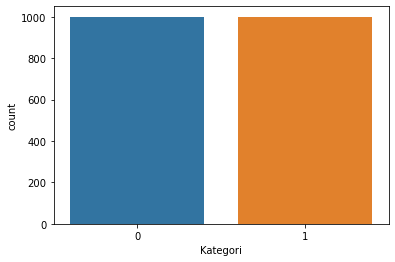

In [10]:
sns.countplot(data_train['Kategori']);

Dari data di atas dapat deketahui kalau akun real dan akun bot memiliki ratio dan jumlah yang sama

# SCREEN NAME

Screen name sama dengan username?

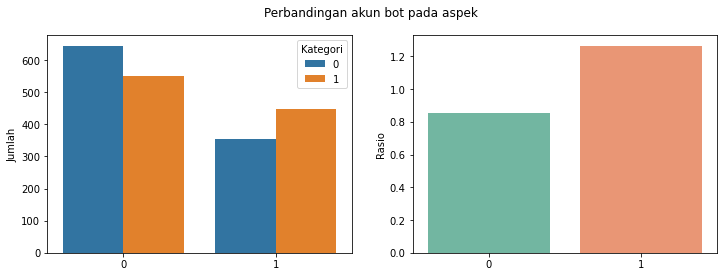

In [11]:
disc(data_train,'Screen name')

Dari data diatas maka jumlah akun bot paling banyak memiliki Screen name sama dengan Username

# FOTO PROFIL

Foto profil yang digunakan adalah foto diri sendiri atau bukan?

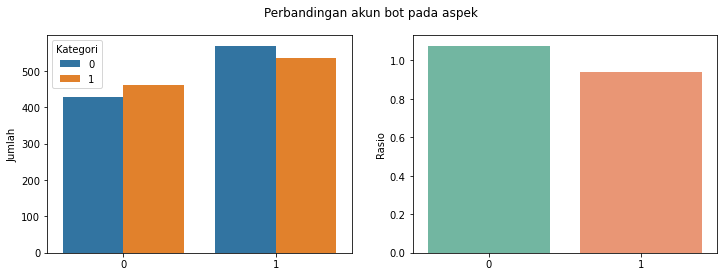

In [12]:
disc(data_train,'Foto Profil')

Dari data diatas maka jumlah akun bot paling banyak tidak memiliki foto profil sendiri

# JUMLAH FOLLOWING

count     2000.000000
mean      1087.301500
std       3152.951083
min          0.000000
25%        138.000000
50%        426.000000
75%       1096.500000
max      97896.000000
Name: Following, dtype: float64


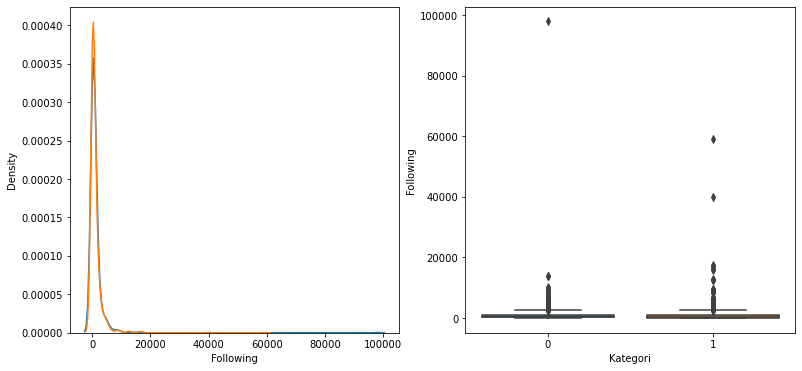

In [13]:
cont(data_train,'Following')

Dari data di atas following paling banyak diantara 0 sampai 7000 akun

# FOLLOWING KURANG DARI 30

Apakah jumlah following kurang dari 30?

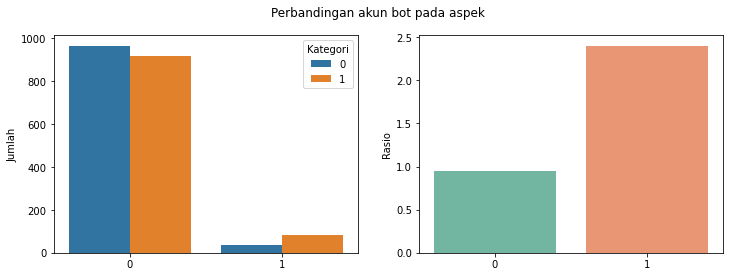

In [14]:
disc(data_train,'Following kurang 30')

Dari data diatas maka jumlah akun bot paling banyak following kurang dari 30

# JUMLAH FOLLOWERS

count    2.000000e+03
mean     1.760980e+04
std      1.860714e+05
min      0.000000e+00
25%      6.300000e+01
50%      3.080000e+02
75%      1.044250e+03
max      6.074499e+06
Name: Followers, dtype: float64


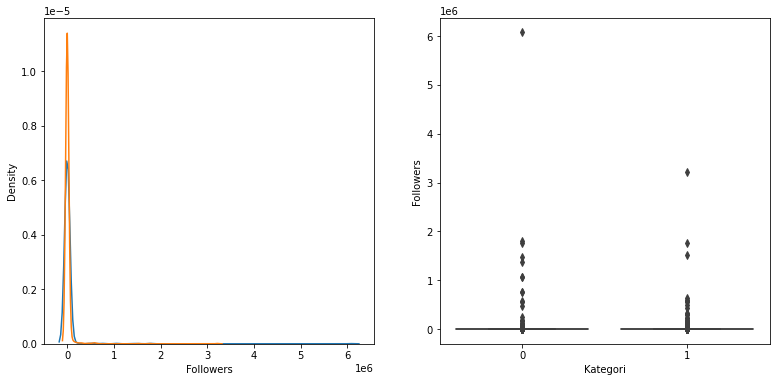

In [15]:
cont(data_train,'Followers')

# FOLLOWERS LEBIH DARI 1000

Apakah jumlah followers lebih dari 1000?

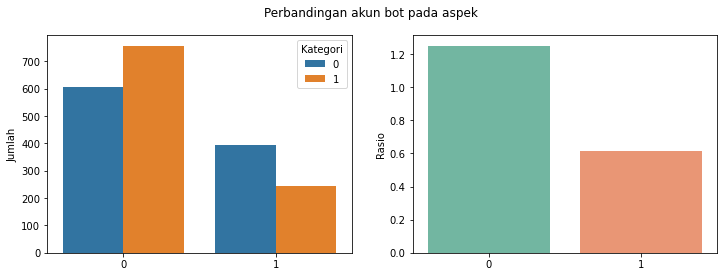

In [16]:
disc(data_train,'Followers lebih 1000')

Jumlah akun Bot lebih banyak memiliki followers tidak lebih dari 1000

# TWEET

count    2.000000e+03
mean     1.760980e+04
std      1.860714e+05
min      0.000000e+00
25%      6.300000e+01
50%      3.080000e+02
75%      1.044250e+03
max      6.074499e+06
Name: Followers, dtype: float64


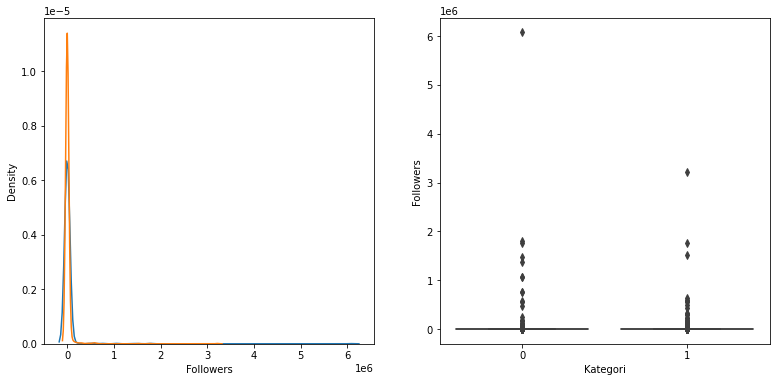

In [17]:
cont(data_train,'Followers')

data lost of outliers :  46
count     1954.000000
mean      1968.479529
std       7128.204292
min          0.000000
25%         58.250000
50%        288.000000
75%        933.000000
max      79319.000000
Name: Followers, dtype: float64


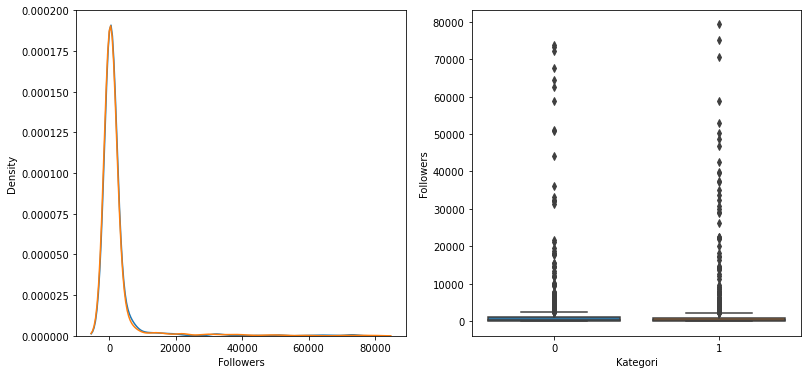

In [18]:
cutting_higher(data_train,'Followers',80000,'outliers')

# TWEET KURANG DARI 50

Apakah jumlah tweet kurang dari 50?

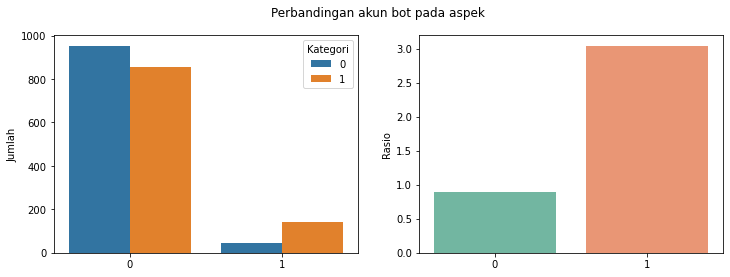

In [19]:
disc(data_train,'Tweet kurang 50')

Paling banyak akun Bot yang memiliki Tweet kurang dari 30

# LOKASI

Mencantumkan lokasi apa tidak?

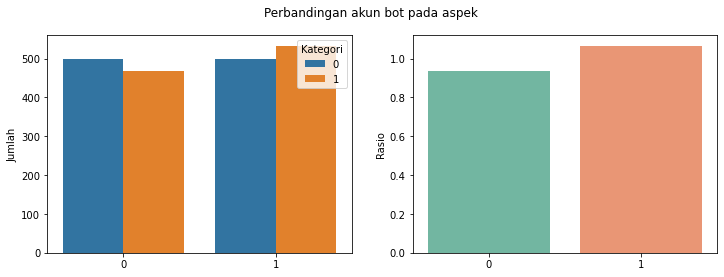

In [20]:
disc(data_train,'Lokasi')

Paling banyak akun Bot mencamtumkan lokasi

# URL

Mencantumkan link pada profil apa tidak?

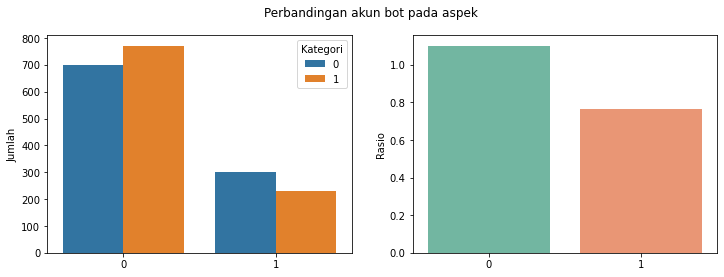

In [21]:
disc(data_train,'URL')

Paling banyak akun bot tidak mencamtukan URL

# DESKRIPSI

Mengisi bio pada profil apa tidak?

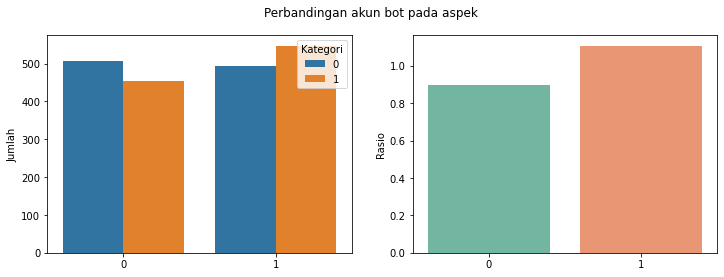

In [22]:
disc(data_train,'Deskripsi')

Paling banyak akun Bot mengisi deskripsi

# FOLLOWERS RATIO 2:1

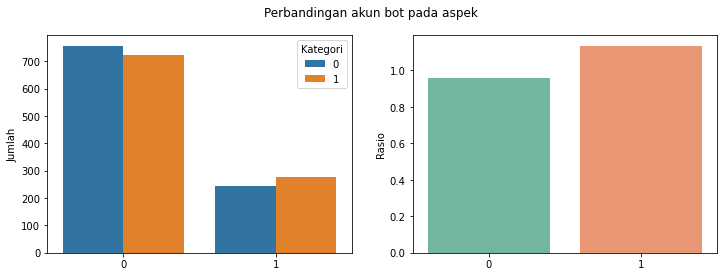

In [23]:
disc(data_train,'Follower Ratio 2:1')

Paling banyak akun Bot memiliki followers ratio 2:1

# FOLLOWERS RATIO 50:1

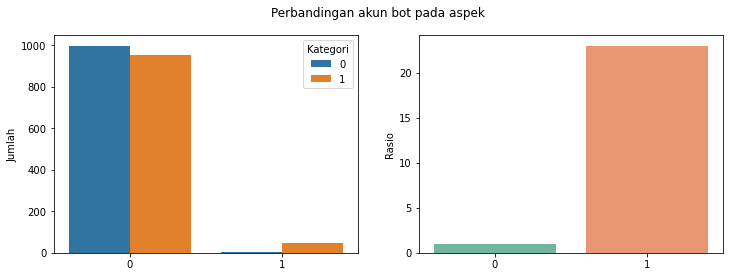

In [24]:
disc(data_train,'Follower Ratio 50:1')

Paling banyak akun Bot memiliki followers ratio 50:1

# FOLLOWERS RATIO 100:1

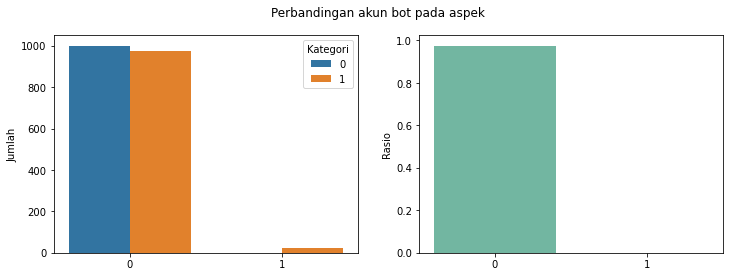

In [25]:
disc(data_train,'Follower Ratio 100:1')

Paling banyak akun Bot tidak memiliki ratio followers 100:1

# POLA AKTIVITAS AKUN

Akun memiliki pola tertentu dalam beraktivitas?

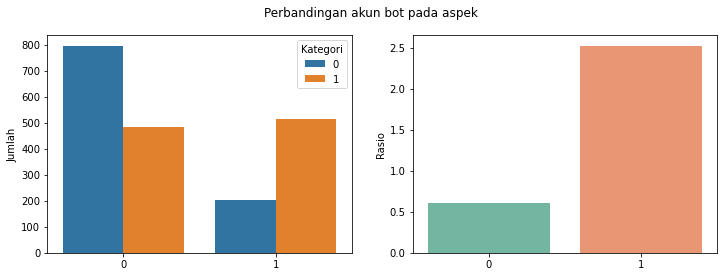

In [26]:
disc(data_train,'Pola Aktivitas Akun')

Paling banyak akun bot memiliki pola tertentu dalam beraktivitas

# USIA AKUN

count    2000.000000
mean       42.015000
std        47.118169
min         0.000000
25%         6.000000
50%        16.000000
75%        86.000000
max       196.000000
Name: Usia Akun (bulan), dtype: float64


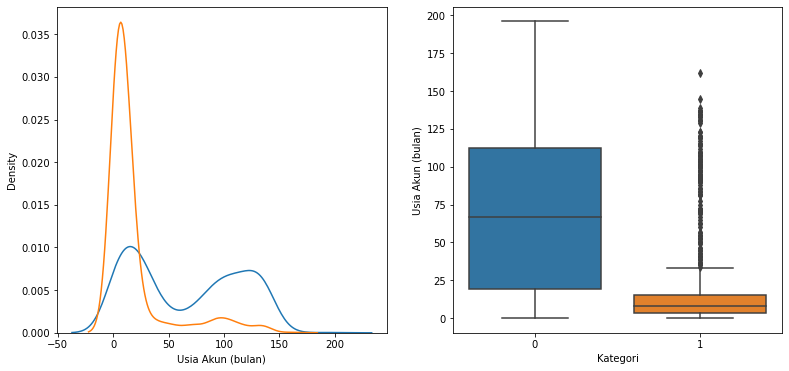

In [27]:
cont(data_train,'Usia Akun (bulan)')

Untuk akun real memiliki usia beragam paling banyak dari 25 hingga 100 bulan lebih. Sedangkan akun bot hanya memiliki usai paling banyak kurang dari 25 bulan

# USIA AKUN KURANG SAMA DENGAN 12

Apakah usia akun kurang dari sama dengan 12 bulan apa tidak?

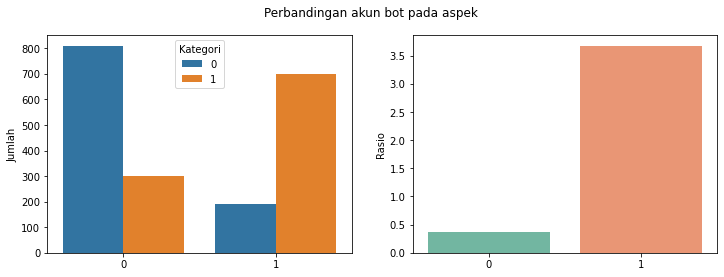

In [28]:
disc(data_train,'Usia Akun kurang sama dengan 12')

Paling banyak akun Bot memiliki usia akun kurang dari sama dengan 12 Bulan

# RATAAN TWEET PERMINGGU

count     2000.000000
mean       242.080485
std       1070.055912
min          0.000000
25%          4.000000
50%         23.000000
75%         97.000000
max      17000.000000
Name: Rataan Tweet per Minggu, dtype: float64


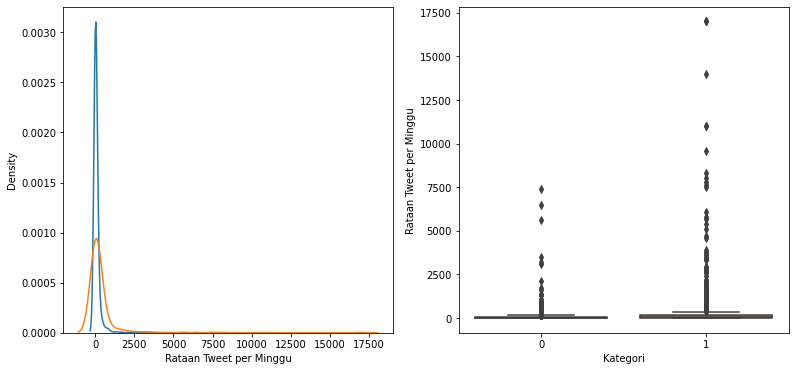

In [29]:
cont(data_train,'Rataan Tweet per Minggu')

kebanyakan akun bot memiliki rata rata tweet perminggu lebih rendah dari akun real

# RETWEET RATIO

Rasio retweet terhadap jumlah tweet (dalam persen)

count    2000.000000
mean       31.746500
std        31.225194
min         0.000000
25%         4.000000
50%        22.000000
75%        54.000000
max       100.000000
Name: Retweet Ratio %, dtype: float64


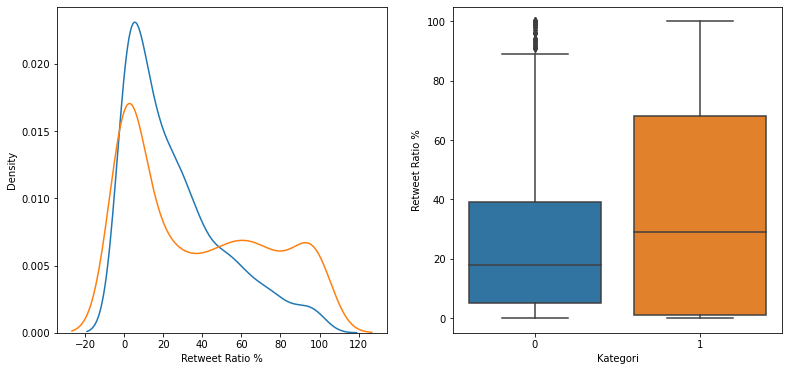

In [30]:
cont(data_train,'Retweet Ratio %')

kebanyakan akun Bot memiliki ratio lebih banyak dari akun real kurang dari 70%

# RETWEET RATIO LEBIH DARI SAMA DENGAN 60%

Apakah retweet ratio lebih dari 60% apa tidak?

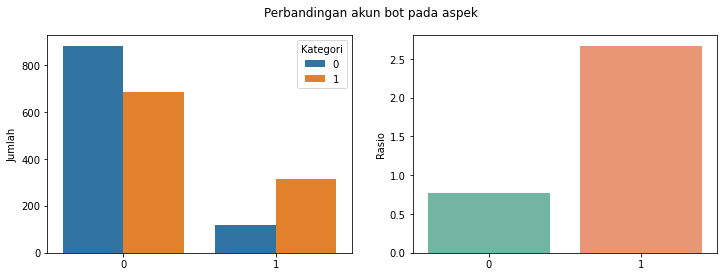

In [31]:
disc(data_train,'Retweet Ratio lebih sama dengan 60')

Paling banyak akun Bot memili retweet ratio lebih dari 60%

# PREPROCESSING

In [44]:
data = data_train.copy()

# kolom primary key tidak dimasukkan ke dalam fitur prediksi
del data['ID']

# ada data yang tidak lengkap
del data['Follower Ratio 100:1']

In [45]:
print('sebelum encoding nominal', data.shape)
display(data.sample(3))

data = pd.get_dummies(data, columns=data.select_dtypes(include='object').columns)

print('sesudah encoding nominal', data.shape)
display(data.sample(3))

sebelum encoding nominal (2000, 20)


,Screen name,Foto Profil,Following,Following kurang 30,Followers,Followers lebih 1000,Tweet,Tweet kurang 50,Lokasi,URL,Deskripsi,Follower Ratio 2:1,Follower Ratio 50:1,Pola Aktivitas Akun,Usia Akun (bulan),Usia Akun kurang sama dengan 12,Rataan Tweet per Minggu,Retweet Ratio %,Retweet Ratio lebih sama dengan 60,Kategori
1513,0,0,746,0,997,0,6196,0,0,0,1,0,0,1,88,0,5.8,25,0,0
1971,0,1,1951,0,304,1,12800,0,1,1,1,0,0,0,139,0,25.0,0,0,0
549,0,1,513,0,115,0,1500,0,1,1,1,1,0,0,7,1,49.0,29,0,1


sesudah encoding nominal (2000, 20)


,Screen name,Foto Profil,Following,Following kurang 30,Followers,Followers lebih 1000,Tweet,Tweet kurang 50,Lokasi,URL,Deskripsi,Follower Ratio 2:1,Follower Ratio 50:1,Pola Aktivitas Akun,Usia Akun (bulan),Usia Akun kurang sama dengan 12,Rataan Tweet per Minggu,Retweet Ratio %,Retweet Ratio lebih sama dengan 60,Kategori
308,1,1,1961,0,1830,1,8837,0,0,0,0,1,0,1,3,1,750.0,80,1,1
1660,0,0,159,0,107,0,244,0,1,0,0,0,0,0,105,0,330.0,16,0,0
1765,0,1,1413,0,676,0,58199,0,0,0,0,1,0,1,118,0,64.0,52,0,0


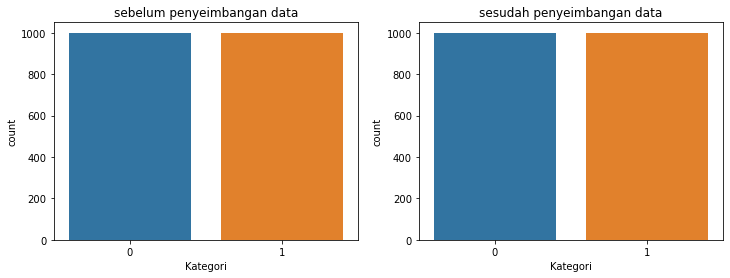

In [50]:
data_model = data.copy()
y = data_model.pop('Kategori')
kolom_fitur = data_model.columns

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(y)
plt.title('sebelum penyeimbangan data')

data_model = pd.DataFrame(data_model, columns=kolom_fitur)

plt.subplot(1,2,2)
sns.countplot(y)
plt.title('sesudah penyeimbangan data')

plt.show()

In [49]:
seleksi = SelectFromModel(RandomForestClassifier(random_state=27),threshold=0.05)
seleksi.fit(data_model, y)

selected_kolom = list(data_model.columns[seleksi.get_support()])
print(selected_kolom)

['Following', 'Followers', 'Tweet', 'Deskripsi', 'Pola Aktivitas Akun', 'Usia Akun (bulan)', 'Usia Akun kurang sama dengan 12', 'Rataan Tweet per Minggu', 'Retweet Ratio %']


# PEMODELAN

In [51]:
# beberapa parameter sudah di tetapkan untuk mempersingkat waktu running
prototipe = RandomForestClassifier(bootstrap=True,random_state=27,n_estimators=500)

param_grid = {
    'max_depth': [80,None],
    'max_features': [2,'auto'],
    'max_samples' : [0.5,1],
    'min_samples_leaf': [1,4],
    'min_samples_split': [2,7]
}

model_ = GridSearchCV(estimator = prototipe, param_grid = param_grid, n_jobs = -1)
model_.fit(data_model, y)

model_.best_params_

{'max_depth': 80,
 'max_features': 2,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

((1600, 19), (400, 19), (1600,), (400,))

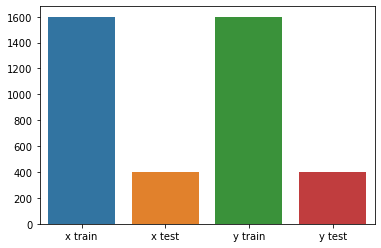

In [52]:
x_train, x_test, y_train, y_test = train_test_split(data_model, y, test_size=0.2, random_state=27)
sns.barplot(x=['x train','x test','y train','y test'], y=[len(x_train),len(x_test),len(y_train),len(y_test)])
x_train.shape, x_test.shape, y_train.shape, y_test.shape